In [1]:
# %pip install networkx
# %pip install matplotlib

from itertools import permutations, chain, combinations
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def pairs(n, ordered=True):
    elements = [i for i in range(n)]
    c = [[i, j] for (i, j) in combinations(elements, 2)]
    if ordered:
        return sorted(c + [[j, i] for [i, j] in c])
    return sorted(c)

pairs(2)

[[0, 1], [1, 0]]

In [3]:
def subsets(collection):
    return sorted([
        [edge for edge in graph]
        for graph in list(chain.from_iterable(combinations(collection, r) for r in range(len(collection)+1)))
    ])

subsets(pairs(2))

[[], [[0, 1]], [[0, 1], [1, 0]], [[1, 0]]]

In [4]:
def permute(n):
    return sorted([
        list(perm)
        for perm in list(permutations([i for i in range(n)]))
    ])

permute(2)

[[0, 1], [1, 0]]

In [5]:
def copy_graph(graph):
    return [[i, j] for [i, j] in graph]

def permutations_of_graph(graph, n, ordered=True):
    result = []
    for p in permute(n):
        substituted = copy_graph(graph)
        for i, [u, v] in enumerate(substituted):
            for j, x in enumerate(p):
                if u == j:
                    substituted[i][0] = x
                elif v == j:
                    substituted[i][1] = x
        result.append(substituted)
    
    if not ordered:
        result = [[sorted(edge) for edge in graph] for graph in result]
    
    return [sorted(graph) for graph in result]

permutations_of_graph([[0, 1],[0, 2]], 3)

[[[0, 1], [0, 2]],
 [[0, 1], [0, 2]],
 [[1, 0], [1, 2]],
 [[1, 0], [1, 2]],
 [[2, 0], [2, 1]],
 [[2, 0], [2, 1]]]

In [6]:
def graphs(n, ordered=True):
    possible_edges = pairs(n, ordered)
    possible_graphs = subsets(possible_edges)
    
    explored_graphs = set()
    result = []
    
    for graph in possible_graphs:
        
        if str(graph) in explored_graphs:
            continue
        
        result.append(graph)
        
        for permutation_of_graph in permutations_of_graph(graph, n, ordered):
            explored_graphs.add(str(permutation_of_graph))
    
    return result
        
graphs(3, ordered=False)

[[], [[0, 1]], [[0, 1], [0, 2]], [[0, 1], [0, 2], [1, 2]]]

In [7]:
print("Undirected graphs of size 4:", len(graphs(4, ordered=False)))
print("Directed graphs of size 4:", len(graphs(4, ordered=True)))

Undirected graphs of size 4: 11
Directed graphs of size 4: 218


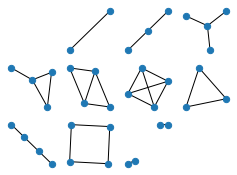

In [8]:
undirected_graphs = graphs(4, ordered=False)

plt.figure(figsize=(4, 4))
for i, graph in enumerate(undirected_graphs):
    plt.subplot(4, 4, i+1)
    G = nx.Graph()
    G.add_edges_from(graph)
    nx.draw(G, node_size=40)
plt.show()

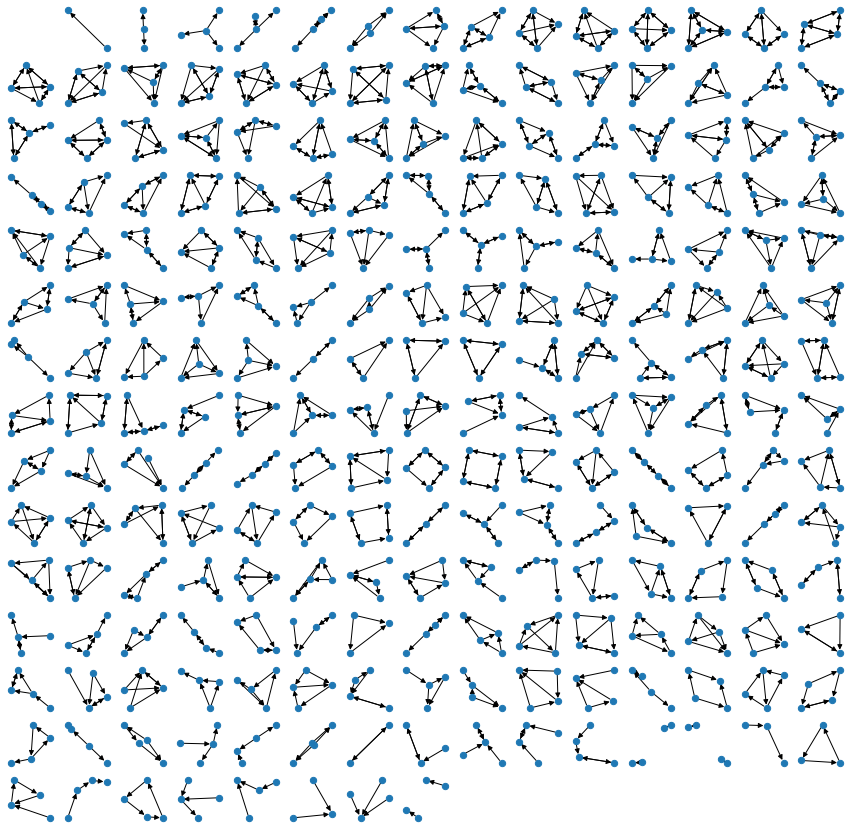

In [9]:
undirected_graphs = graphs(4, ordered=True)

plt.figure(figsize=(15, 15))
for i, graph in enumerate(undirected_graphs):
    plt.subplot(15, 15, i+1)
    G = nx.DiGraph()
    G.add_edges_from(graph)
    nx.draw(G, node_size=40)
plt.show()